# 🗳️ Elecciones EEUU

🧑‍💻 Lucía Cordero | Jorge Garcelán

![Election Results](https://www.porunmundomasjusto.es/wp-content/uploads/2020/11/mundomasjusto.png)


<div class="warning" style='padding:0.1em; border-left: 4px solid #17a2b8; background-color:#e8f8ff;'>
<span>
<p style='margin-top:1em; margin-left:1em; text-align:left'>
<b>🎯Motivación y Objetivos</b></p>
<p style='margin-left:1em;'>
Este proyecto de análisis de datos está basado en los resultados de las <strong>elecciones presidenciales de Estados Unidos de 2020</strong>. Inspirados por nuestro interés en la política y teniendo en cuenta que las elecciones presidenciales de EE.UU. de 2024 son el 5 de noviembre, se nos ocurrió abordar este tema.
<br><br>
    El objetivo es aplicar técnicas de <strong>aprendizaje supervisado</strong> y <strong>no supervisado</strong> para explorar patrones y tendencias, así como predecir los resultados electorales en función de las características socioeconómicas y demográficas de cada condado. Este enfoque nos permite estudiar cómo estos factores influyen en los comportamientos de los votantes y cómo podrían anticiparse los resultados de futuras elecciones.
</p>
</span>
</div>

<div style="border-left: 4px solid #ffa500; background-color: #fff4e5; padding: 10px;">
    <strong>⚠️Warning:</strong> Es importante mencionar que no hemos podido utilizar los datos de 2024 como test pues no se encuentran disponibles todavía.
</div>


## Librerías

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


## Datasets

### Seleccionar año

In [27]:
CENSUS_YEAR = 2019 # 2015, 2019, 2023
ELECTORAL_YEAR = CENSUS_YEAR + 1

### Cargar datos

In [28]:
data = pd.read_csv(f'data/final_data_{ELECTORAL_YEAR}.csv')

## Regresión

<div style="border-left: 4px solid #17a2b8; background-color: #e8f8ff; padding: 10px;">
    <strong>🎯Objetivo:</strong> Predecir el porcentaje de votos a Biden en cada condado (y, por tanto, también el de Trump).
</div>


#### Dataset

In [29]:
# columns_to_drop = ['Total_2020', 'Other_2020', 'Winner_2020', "Biden_2020"]  # Nombres de las columnas a eliminar
columns_to_drop = ["votes_gop", "votes_dem", "total_votes", "votes_others", "per_votes_others", "winner",
                   'county_fips', "county", "state_code", "county_code"]  # Nombres de las columnas a eliminar

data_reg = data.drop(columns=columns_to_drop)
data_reg

,state,per_dem,per_gop,pop_total,median_age,median_income,households_median_value,households_avg_size,households_total,households_median_gross_rent,...,hispanic_rate,two_more_races_rate,high_school_rate,bachelors_rate,poverty_rate,households_renter_rate,households_owner_rate,unemployment_rate,public_transport_rate,no_health_insurance_rate
0,Alabama,0.270184,0.714368,55380,38.2,58731,154500,2.56,21397,986,...,2.83,2.16,19.21,10.87,15.06,26.71,73.29,3.68,0.29,6.96
1,Alabama,0.224090,0.761714,212830,43.0,58320,197900,2.59,80930,1020,...,4.56,1.69,15.90,14.94,10.20,24.75,75.25,4.26,0.02,8.78
2,Alabama,0.457882,0.534512,25361,40.4,32525,90700,2.41,9345,576,...,4.36,1.20,20.10,5.39,27.11,39.10,60.90,9.17,0.11,10.03
3,Alabama,0.206983,0.784263,22493,40.9,47542,92800,2.99,6891,734,...,2.57,0.63,25.35,4.64,16.63,25.58,74.42,7.28,0.00,9.79
4,Alabama,0.095694,0.895716,57681,40.7,49358,127800,2.74,20847,667,...,9.26,1.59,18.57,5.95,13.42,21.22,78.78,3.36,0.05,10.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3103,Wyoming,0.230260,0.736554,43521,35.3,74843,205600,2.77,15523,861,...,15.88,2.27,16.58,9.50,11.31,23.78,76.22,6.09,1.41,11.18
3104,Wyoming,0.670982,0.295769,23280,39.3,84678,866600,2.47,9019,1376,...,15.03,0.65,10.19,28.98,6.13,39.59,60.41,1.08,2.12,12.71
3105,Wyoming,0.169219,0.797277,20479,35.8,63403,175000,2.66,7597,698,...,9.13,3.55,21.49,7.00,11.22,22.94,77.06,6.28,1.47,11.09
3106,Wyoming,0.162263,0.808824,8027,42.9,54158,165800,2.34,3365,640,...,14.23,3.79,15.72,10.64,10.28,23.51,76.49,3.92,0.00,14.73


In [30]:
# from sklearn.preprocessing import StandardScaler

# # Definir las columnas a excluir del escalado
# cols_excluir = ['state', 'per_dem', 'per_gop'] 

# # Seleccionar solo las columnas que deben ser escaladas
# cols_escalar = [col for col in data_reg.columns if col not in cols_excluir]

# # Aplicar StandardScaler solo a las columnas seleccionadas
# scaler = StandardScaler()
# data_reg[cols_escalar] = scaler.fit_transform(data_reg[cols_escalar])

# # Mostrar los primeros registros
# data_reg.head()

#### Data Splitting

In [31]:
# Quitar la columna objetivo (f"per_dem_{ELECTORAL_YEAR}") del conjunto de datos
X = data_reg.drop(columns=["per_dem", "per_gop"])  # Características (sin la columna objetivo)

In [32]:
# y_dem = data_reg["per_dem"]  # Columna objetivo

# # Dividir los datos en 80% para train y 20% para test
# X_train, X_test, y_train_dem, y_test_dem = train_test_split(X, y_dem, test_size=0.2, random_state=42)

In [33]:
from sklearn.model_selection import train_test_split

# Columna objetivo dem
y_dem = data_reg["per_dem"]  

# Asegurar que cada estado tiene representación en train y test
train_idx, test_idx = [], []

for state in data_reg["state"].unique():
    state_data = data_reg[data_reg["state"] == state]
    
    if len(state_data) < 5:  # Si hay pocos condados, los dejamos todos en train
        train_idx.extend(state_data.index)
    else:
        train_set, test_set = train_test_split(state_data, test_size=0.2, random_state=42)
        train_idx.extend(train_set.index)
        test_idx.extend(test_set.index)

X_train, X_test = X.loc[train_idx], X.loc[test_idx]
y_train_dem, y_test_dem = y_dem.loc[train_idx], y_dem.loc[test_idx]

# Ver distribución
print("X_train:\n", X_train["state"].value_counts())
print("X_test:\n", X_test["state"].value_counts())


X_train:
 state
Texas                   201
Georgia                 127
Virginia                106
Kentucky                 96
Missouri                 92
Kansas                   84
Illinois                 81
North Carolina           80
Iowa                     79
Tennessee                76
Nebraska                 74
Indiana                  73
Ohio                     70
Minnesota                69
Michigan                 66
Mississippi              65
Oklahoma                 61
Arkansas                 60
Wisconsin                57
Florida                  53
Alabama                  53
Pennsylvania             53
South Dakota             52
Louisiana                51
Colorado                 51
New York                 49
California               46
West Virginia            44
Montana                  44
North Dakota             42
South Carolina           36
Idaho                    35
Washington               31
Oregon                   28
New Mexico               26
Utah

In [34]:
# y_gop = data_reg["per_gop"]  # Columna objetivo

# # Dividir los datos en 80% para train y 20% para test
# _, _, y_train_gop, y_test_gop = train_test_split(X, y_gop, test_size=0.2, random_state=42)

In [35]:
from sklearn.model_selection import train_test_split

# Columna objetivo gop
y_gop = data_reg["per_gop"]  

# Asegurar que cada estado tiene representación en train y test
train_idx, test_idx = [], []

for state in data_reg["state"].unique():
    state_data = data_reg[data_reg["state"] == state]
    
    if len(state_data) < 5:  # Si hay pocos condados, los dejamos todos en train
        train_idx.extend(state_data.index)
    else:
        train_set, test_set = train_test_split(state_data, test_size=0.2, random_state=42)
        train_idx.extend(train_set.index)
        test_idx.extend(test_set.index)

X_train, X_test = X.loc[train_idx], X.loc[test_idx]
y_train_gop, y_test_gop = y_gop.loc[train_idx], y_gop.loc[test_idx]

# Ver distribución
print("X_train:\n", X_train["state"].value_counts())
print("X_test:\n", X_test["state"].value_counts())

X_train:
 state
Texas                   201
Georgia                 127
Virginia                106
Kentucky                 96
Missouri                 92
Kansas                   84
Illinois                 81
North Carolina           80
Iowa                     79
Tennessee                76
Nebraska                 74
Indiana                  73
Ohio                     70
Minnesota                69
Michigan                 66
Mississippi              65
Oklahoma                 61
Arkansas                 60
Wisconsin                57
Florida                  53
Alabama                  53
Pennsylvania             53
South Dakota             52
Louisiana                51
Colorado                 51
New York                 49
California               46
West Virginia            44
Montana                  44
North Dakota             42
South Carolina           36
Idaho                    35
Washington               31
Oregon                   28
New Mexico               26
Utah

In [36]:
columns_to_drop = ["state"]  # Nombres de las columnas a eliminar

X_train = X_train.drop(columns=columns_to_drop)
X_train

,pop_total,median_age,median_income,households_median_value,households_avg_size,households_total,households_median_gross_rent,mean_travel_time,pop_total_male_rate,pop_total_female_rate,...,hispanic_rate,two_more_races_rate,high_school_rate,bachelors_rate,poverty_rate,households_renter_rate,households_owner_rate,unemployment_rate,public_transport_rate,no_health_insurance_rate
62,207305,33.0,53326,170400,2.72,72461,846,89310,48.24,51.76,...,3.72,1.06,15.63,11.44,16.76,36.25,63.75,5.81,0.24,7.19
34,104702,40.1,47580,137600,2.64,39311,754,42623,47.94,52.06,...,3.32,2.20,17.65,9.25,18.04,34.30,65.70,6.42,0.02,10.41
48,414114,37.9,47583,130200,2.60,156251,853,165076,47.66,52.34,...,2.90,1.84,19.40,10.38,18.42,35.45,64.55,5.83,0.19,11.09
7,114618,39.6,47255,118000,2.50,44605,716,46008,48.11,51.89,...,3.80,2.39,18.11,7.25,17.42,29.93,70.07,8.08,0.16,9.37
41,94727,39.7,59686,158800,2.86,32143,691,39178,49.92,50.08,...,6.02,1.82,16.54,12.09,13.13,22.38,77.62,6.24,0.09,9.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,13342,44.1,54289,174000,2.42,5207,705,5667,50.88,49.12,...,10.59,2.34,17.19,11.39,10.83,26.33,73.67,7.41,0.00,10.92
3095,98320,37.0,66910,227900,2.43,39683,950,46447,50.71,49.29,...,14.62,3.65,14.23,12.06,9.69,30.22,69.78,5.13,0.26,7.62
3099,29148,44.5,63582,268500,2.33,12160,882,12721,49.22,50.78,...,5.44,2.02,15.54,15.30,8.27,26.83,73.17,3.16,0.18,11.38
3104,23280,39.3,84678,866600,2.47,9019,1376,13079,52.94,47.06,...,15.03,0.65,10.19,28.98,6.13,39.59,60.41,1.08,2.12,12.71


In [37]:
columns_to_drop = ["state"]  # Nombres de las columnas a eliminar

X_test = X_test.drop(columns=columns_to_drop)
X_test

,pop_total,median_age,median_income,households_median_value,households_avg_size,households_total,households_median_gross_rent,mean_travel_time,pop_total_male_rate,pop_total_female_rate,...,hispanic_rate,two_more_races_rate,high_school_rate,bachelors_rate,poverty_rate,households_renter_rate,households_owner_rate,unemployment_rate,public_transport_rate,no_health_insurance_rate
36,659680,37.7,53901,159100,2.47,261231,900,289916,47.30,52.70,...,3.87,1.65,15.40,13.88,15.68,37.30,62.70,6.47,0.40,9.13
16,54771,42.4,48065,120800,2.48,21880,697,21984,47.99,52.01,...,2.84,2.04,22.12,8.20,15.32,27.81,72.19,4.35,0.05,7.15
4,57681,40.7,49358,127800,2.74,20847,667,21361,49.40,50.60,...,9.26,1.59,18.57,5.95,13.42,21.22,78.78,3.36,0.05,10.68
9,25903,46.5,41919,123400,2.39,10737,620,9703,49.33,50.67,...,1.59,0.87,23.81,4.84,13.74,22.66,77.34,4.43,0.08,8.56
45,19321,42.2,33241,84400,2.59,7361,563,6325,48.13,51.87,...,1.01,0.43,22.92,5.88,21.60,28.52,71.48,7.97,0.00,8.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3100,8582,49.2,50903,188500,2.10,4030,763,3960,52.80,47.20,...,8.13,2.46,24.60,8.31,13.67,25.24,74.76,1.98,0.21,11.10
3094,8487,45.4,58132,252900,2.18,3845,942,3757,52.26,47.74,...,2.73,1.20,17.21,14.79,11.90,30.12,69.88,3.78,0.16,12.88
3085,38390,27.6,49322,235000,2.26,15944,796,19855,51.92,48.08,...,9.53,3.03,6.71,16.07,19.42,48.96,51.04,4.53,0.74,8.18
3093,4607,46.6,51413,147300,2.13,2118,730,1875,50.18,49.82,...,3.80,1.04,16.67,11.53,14.80,24.79,75.21,2.98,0.20,13.81


#### Benchmark Model

In [38]:
# Resumen estadístico
print(y_train_dem.describe())

count    2471.000000
mean        0.332011
std         0.158978
min         0.030909
25%         0.208589
50%         0.299108
75%         0.422124
max         0.921497
Name: per_dem, dtype: float64


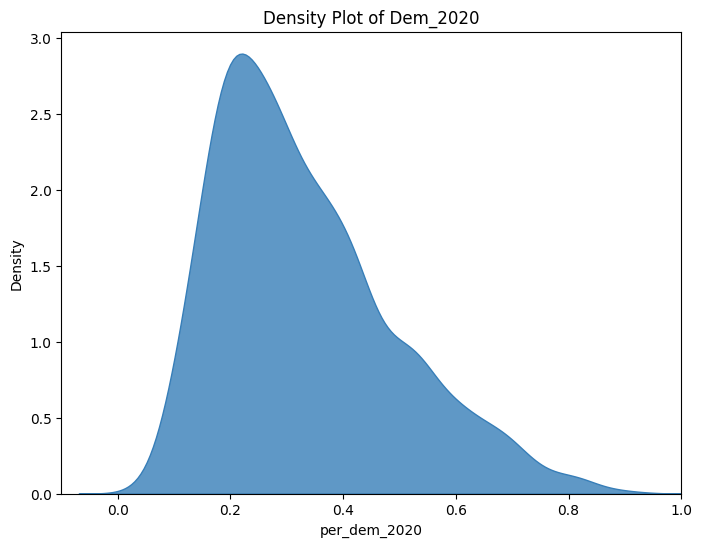

In [39]:
# Crear la gráfica de densidad
plt.figure(figsize=(8, 6))
sns.kdeplot(y_train_dem, color="#377eb8", fill=True, alpha=0.8)

# Configurar el título y etiquetas
plt.title(f"Density Plot of Dem_{ELECTORAL_YEAR}")
plt.xlabel(f"per_dem_{ELECTORAL_YEAR}")
plt.ylabel("Density")
plt.xlim(-0.1, 1)

# Mostrar la gráfica
plt.show()

In [40]:
average_dem_percentage = y_train_dem.mean()

# Usar f-strings para concatenar el mensaje y el valor promedio
print(f"Av. percentage of Dem: {average_dem_percentage}")

Av. percentage of Dem: 0.3320106906657271


#### Importancia de las variables

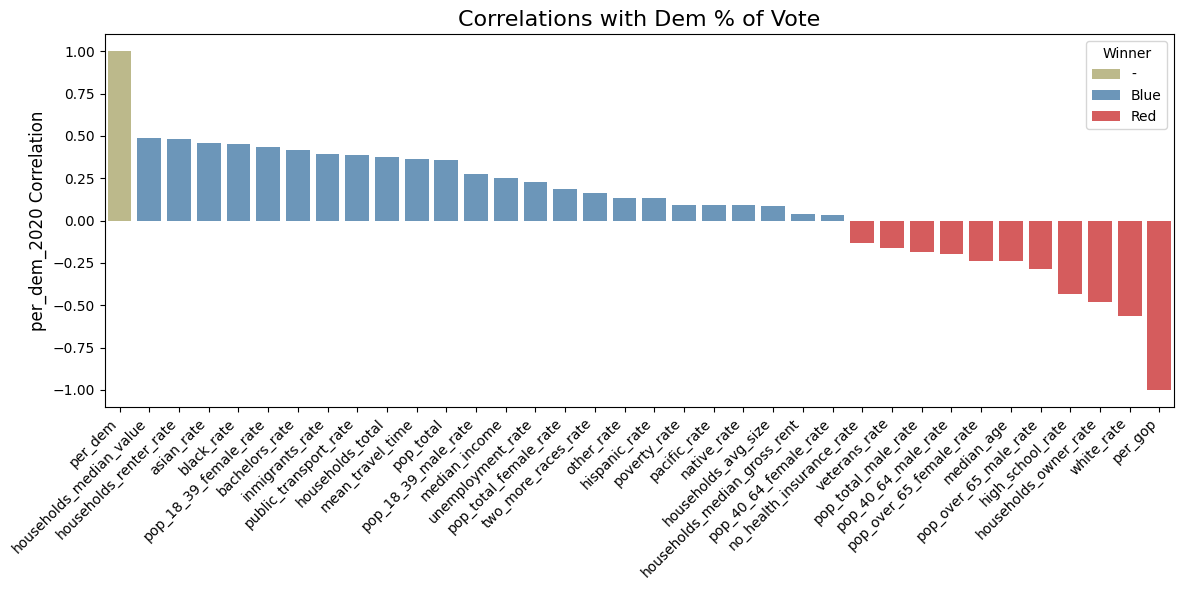

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Filtrar solo columnas numéricas
numeric_data = data_reg.select_dtypes(include=[np.number])

# Paso 2: Calcular las correlaciones
corr_votes = numeric_data.corr()["per_dem"].sort_values(ascending=False)

# Paso 3: Crear el DataFrame de correlaciones
corr_df = pd.DataFrame(corr_votes).reset_index()
corr_df.columns = ['Variable', 'Correlation']

# Clasificar como "Red", "Blue", o "-"
corr_df['Winner'] = np.where(corr_df['Correlation'] < 0, 'Red', 
                             np.where(corr_df['Correlation'] == 1, '-', 'Blue'))

# Paso 4: Visualizar con un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=corr_df, x='Variable', y='Correlation', hue='Winner', dodge=False,
            palette={"Red": "#e41a1c", "Blue": "#377eb8", "-": "#b6b164"}, alpha=0.8)

plt.title("Correlations with Dem % of Vote", fontsize=16)
plt.xlabel("")
plt.ylabel(f"per_dem_{ELECTORAL_YEAR} Correlation", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Winner')
plt.tight_layout()
plt.show()

Mejores variables seleccionadas: ['households_median_gross_rent', 'black_rate', 'bachelors_rate', 'native_rate', 'no_health_insurance_rate', 'hispanic_rate', 'poverty_rate', 'households_median_value', 'pop_18_39_female_rate', 'households_avg_size', 'pop_40_64_female_rate', 'unemployment_rate', 'asian_rate', 'median_income', 'high_school_rate', 'pop_total_female_rate', 'pop_over_65_female_rate', 'median_age', 'households_owner_rate', 'other_rate', 'inmigrants_rate', 'two_more_races_rate', 'pop_18_39_male_rate', 'white_rate', 'pop_40_64_male_rate', 'pop_over_65_male_rate', 'households_total', 'pop_total', 'public_transport_rate', 'mean_travel_time', 'veterans_rate', 'pacific_rate', 'pop_total_male_rate', 'const', 'households_renter_rate']


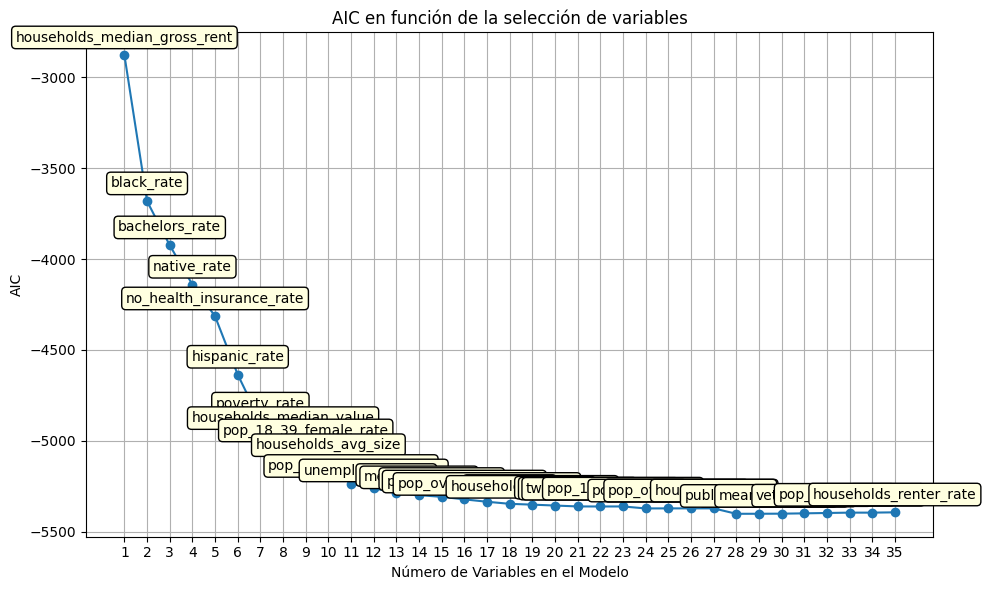

In [42]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Supongamos que data_train ya está definido y contiene las variables necesarias
# Definir la variable dependiente (y) y las independientes (X)

# Asegúrate de que X es un DataFrame y añadir una constante
X_train_fw = sm.add_constant(X_train)

# Función para la selección hacia adelante basada en AIC
def forward_selection(y, X):
    initial_features = X.columns.tolist()
    best_aic = float('inf')
    best_features = []
    aic_values = []  # Lista para almacenar los valores de AIC


    while initial_features:
        aic_values_temp = []

        for feature in initial_features:
            model = sm.OLS(y, X[best_features + [feature]]).fit()
            aic_values_temp.append((model.aic, feature))
        
        
        # Encontrar la variable que minimiza el AIC
        aic_values_temp.sort()
        best_aic, best_feature = aic_values_temp[0]
        
        if best_aic < float('inf'):
            best_features.append(best_feature)
            initial_features.remove(best_feature)
            aic_values.append(best_aic)  # Guardar el AIC en cada iteración
       
        else:
            break
            
    return best_features, aic_values

# Ejecutar la selección hacia adelante
selected_features, aic_history = forward_selection(y_train_dem, X_train_fw)

# Mostrar los resultados
print("Mejores variables seleccionadas:", selected_features)

# Paso 2: Graficar los valores de AIC
plt.figure(figsize=(10, 6))
plt.plot(aic_history, marker='o')
plt.title('AIC en función de la selección de variables')
plt.xlabel('Número de Variables en el Modelo')
plt.ylabel('AIC')
plt.xticks(range(len(aic_history)), range(1, len(aic_history) + 1))  # Etiquetas para el número de variables
plt.grid()
# Añadir etiquetas con el nombre de las variables
for i, feature in enumerate(selected_features):
    plt.annotate(feature, 
                 (i, aic_history[i]),  # Coordenadas de los puntos
                 textcoords="offset points", 
                 xytext=(0, 10),  # Desplazamiento vertical de 10 unidades
                 ha='center',
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightyellow'))

# Ajustar el gráfico para evitar el solapamiento
plt.tight_layout()
plt.show()

#### Linear Regression

- Dem

In [43]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import numpy as np

# Crear el objeto de validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

# Probar diferentes versiones de regresión para mejorar el modelo
models = {
    "linear_regression": LinearRegression(),
    "ridge": Ridge(alpha=1.0),  # Regularización L2
    "lasso": Lasso(alpha=0.1)   # Regularización L1
}

best_model = None
best_r2 = float('-inf')
results = {}

for name, model in models.items():
    model.fit(X_train, y_train_dem)
    
    # Evaluación con validación cruzada
    mse_scores = -cross_val_score(model, X_train, y_train_dem, scoring='neg_mean_squared_error', cv=cv)
    r2_scores = cross_val_score(model, X_train, y_train_dem, scoring='r2', cv=cv)
    
    # Promedio y desviación estándar de las métricas
    mean_mse = mse_scores.mean()
    std_mse = mse_scores.std()
    mean_r2 = r2_scores.mean()
    std_r2 = r2_scores.std()

    # Evaluación en el conjunto de test
    y_pred_dem = model.predict(X_test)
    mse_test = mean_squared_error(y_test_dem, y_pred_dem)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test_dem, y_pred_dem)
    r2_test = r2_score(y_test_dem, y_pred_dem)

    results[name] = {
        "Mean R² (CV)": mean_r2,
        "Std R² (CV)": std_r2,
        "Mean MSE (CV)": mean_mse,
        "Std MSE (CV)": std_mse,
        "Test R²": r2_test,
        "Test MSE": mse_test,
        "Test RMSE": rmse_test,
        "Test MAE": mae_test
    }
    
    # Guardar el mejor modelo basado en R²
    if mean_r2 > best_r2:
        best_r2 = mean_r2
        best_model = model
        best_name = name

# Guardar el mejor modelo encontrado
joblib.dump(best_model, f'models/{best_name.lower()}_dem_{ELECTORAL_YEAR}.pkl')

# Mostrar resultados
print(f'Best Model: {best_name}')
for model, metrics in results.items():
    print(f'\nModel: {model}')
    for metric, value in metrics.items():
        print(f'  {metric}: {value:.4f}')


/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.414e+01, tolerance: 6.243e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.152e+01, tolerance: 5.103e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the

Best Model: ridge

Model: linear_regression
  Mean R² (CV): 0.7322
  Std R² (CV): 0.0200
  Mean MSE (CV): 0.0067
  Std MSE (CV): 0.0004
  Test R²: -103189242.7335
  Test MSE: 2696356.2411
  Test RMSE: 1642.0585
  Test MAE: 112.7546

Model: ridge
  Mean R² (CV): 0.7325
  Std R² (CV): 0.0199
  Mean MSE (CV): 0.0067
  Std MSE (CV): 0.0004
  Test R²: -103015698.8647
  Test MSE: 2691821.5040
  Test RMSE: 1640.6771
  Test MAE: 112.6598

Model: lasso
  Mean R² (CV): 0.5930
  Std R² (CV): 0.0298
  Mean MSE (CV): 0.0102
  Std MSE (CV): 0.0007
  Test R²: -1184951687.8807
  Test MSE: 30963032.2513
  Test RMSE: 5564.4436
  Test MAE: 381.9509


/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.107e+01, tolerance: 5.017e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.148e+01, tolerance: 5.007e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the

- GOP

In [44]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import numpy as np

# Crear el objeto de validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

# Probar diferentes versiones de regresión para mejorar el modelo
models = {
    "linear_regression": LinearRegression(),
    "ridge": Ridge(alpha=1.0),  # Regularización L2
    "lasso": Lasso(alpha=0.1)   # Regularización L1
}

best_model = None
best_r2 = float('-inf')
results = {}

for name, model in models.items():
    model.fit(X_train, y_train_gop)
    
    # Evaluación con validación cruzada
    mse_scores = -cross_val_score(model, X_train, y_train_gop, scoring='neg_mean_squared_error', cv=cv)
    r2_scores = cross_val_score(model, X_train, y_train_gop, scoring='r2', cv=cv)
    
    # Promedio y desviación estándar de las métricas
    mean_mse = mse_scores.mean()
    std_mse = mse_scores.std()
    mean_r2 = r2_scores.mean()
    std_r2 = r2_scores.std()

    # Evaluación en el conjunto de test
    y_pred_gop = model.predict(X_test)
    mse_test = mean_squared_error(y_test_gop, y_pred_gop)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test_gop, y_pred_gop)
    r2_test = r2_score(y_test_gop, y_pred_gop)

    results[name] = {
        "Mean R² (CV)": mean_r2,
        "Std R² (CV)": std_r2,
        "Mean MSE (CV)": mean_mse,
        "Std MSE (CV)": std_mse,
        "Test R²": r2_test,
        "Test MSE": mse_test,
        "Test RMSE": rmse_test,
        "Test MAE": mae_test
    }
    
    # Guardar el mejor modelo basado en R²
    if mean_r2 > best_r2:
        best_r2 = mean_r2
        best_model = model
        best_name = name

# Guardar el mejor modelo encontrado
joblib.dump(best_model, f'models/{best_name.lower()}_gop_{ELECTORAL_YEAR}.pkl')

# Mostrar resultados
print(f'Best Model: {best_name}')
for model, metrics in results.items():
    print(f'\nModel: {model}')
    for metric, value in metrics.items():
        print(f'  {metric}: {value:.4f}')


/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.455e+01, tolerance: 6.361e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.187e+01, tolerance: 5.194e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the

Best Model: ridge

Model: linear_regression
  Mean R² (CV): 0.7285
  Std R² (CV): 0.0196
  Mean MSE (CV): 0.0070
  Std MSE (CV): 0.0004
  Test R²: -67520187.3259
  Test MSE: 1794071.0721
  Test RMSE: 1339.4294
  Test MAE: 91.9874

Model: ridge
  Mean R² (CV): 0.7287
  Std R² (CV): 0.0195
  Mean MSE (CV): 0.0069
  Std MSE (CV): 0.0004
  Test R²: -67361020.8191
  Test MSE: 1789841.8774
  Test RMSE: 1337.8497
  Test MAE: 91.8790

Model: lasso
  Mean R² (CV): 0.5910
  Std R² (CV): 0.0290
  Mean MSE (CV): 0.0105
  Std MSE (CV): 0.0007
  Test R²: -1018102449.4504
  Test MSE: 27051881.8160
  Test RMSE: 5201.1424
  Test MAE: 357.0197


/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.153e+01, tolerance: 5.068e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.187e+01, tolerance: 5.148e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the

#### Random Forest

- Dem

In [45]:
from sklearn.model_selection import RepeatedKFold, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import numpy as np

# Crear el objeto de validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

# Definir el rango de hiperparámetros para optimizar
param_dist = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 10, 20, 30, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['auto', 'sqrt']
}

# Inicializar modelo base
base_model = RandomForestRegressor(random_state=1)

# Búsqueda de hiperparámetros con RandomizedSearchCV
random_search = RandomizedSearchCV(base_model, param_distributions=param_dist, 
                                   n_iter=20, scoring='neg_mean_squared_error', 
                                   cv=cv, random_state=1, n_jobs=-1)
random_search.fit(X_train, y_train_dem)

# Mejor modelo encontrado
best_model = random_search.best_estimator_

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de test
y_pred_dem = best_model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test_dem, y_pred_dem)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_dem, y_pred_dem)
r2 = r2_score(y_test_dem, y_pred_dem)

# Evaluar el modelo usando validación cruzada con los mejores hiperparámetros
mse_scores = -cross_val_score(best_model, X_train, y_train_dem, scoring='neg_mean_squared_error', cv=cv)
r2_scores = cross_val_score(best_model, X_train, y_train_dem, scoring='r2', cv=cv)

# Guardar el mejor modelo
joblib.dump(best_model, f'models/random_forest_dem_{ELECTORAL_YEAR}.pkl')

# Mostrar los resultados
print(f'Best Hyperparameters: {random_search.best_params_}')
print(f'Mean R² from Cross-Validation: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}')
print(f'Mean MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}')
print(f'Test Set Metrics:')
print(f'  R²: {r2:.4f}')
print(f'  MSE: {mse:.4f}')
print(f'  RMSE: {rmse:.4f}')
print(f'  MAE: {mae:.4f}')

/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
450 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
138 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/jorgegarcelan/Desktop/T3CHFEST/US-Electio

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Mean R² from Cross-Validation: 0.7793 ± 0.0162
Mean MSE: 0.0056 ± 0.0004
Test Set Metrics:
  R²: 0.7834
  MSE: 0.0057
  RMSE: 0.0752
  MAE: 0.0570


- GOP

In [46]:
from sklearn.model_selection import RepeatedKFold, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import numpy as np

# Crear el objeto de validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

# Definir el rango de hiperparámetros para optimizar
param_dist = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 10, 20, 30, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['auto', 'sqrt']
}

# Inicializar modelo base
base_model = RandomForestRegressor(random_state=1)

# Búsqueda de hiperparámetros con RandomizedSearchCV
random_search = RandomizedSearchCV(base_model, param_distributions=param_dist, 
                                   n_iter=20, scoring='neg_mean_squared_error', 
                                   cv=cv, random_state=1, n_jobs=-1)
random_search.fit(X_train, y_train_gop)

# Mejor modelo encontrado
best_model = random_search.best_estimator_

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de test
y_pred_gop = best_model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test_gop, y_pred_gop)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_gop, y_pred_gop)
r2 = r2_score(y_test_gop, y_pred_gop)

# Evaluar el modelo usando validación cruzada con los mejores hiperparámetros
mse_scores = -cross_val_score(best_model, X_train, y_train_gop, scoring='neg_mean_squared_error', cv=cv)
r2_scores = cross_val_score(best_model, X_train, y_train_gop, scoring='r2', cv=cv)

# Guardar el mejor modelo
joblib.dump(best_model, f'models/random_forest_gop_{ELECTORAL_YEAR}.pkl')

# Mostrar los resultados
print(f'Best Hyperparameters: {random_search.best_params_}')
print(f'Mean R² from Cross-Validation: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}')
print(f'Mean MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}')
print(f'Test Set Metrics:')
print(f'  R²: {r2:.4f}')
print(f'  MSE: {mse:.4f}')
print(f'  RMSE: {rmse:.4f}')
print(f'  MAE: {mae:.4f}')

/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
450 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
279 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jorgegarcelan/Desktop/T3CHFEST/US-Elections/.venv/lib/python3.9/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/jorgegarcelan/Desktop/T3CHFEST/US-Electio

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Mean R² from Cross-Validation: 0.7779 ± 0.0160
Mean MSE: 0.0057 ± 0.0005
Test Set Metrics:
  R²: 0.7802
  MSE: 0.0058
  RMSE: 0.0764
  MAE: 0.0581


#### KNN

- Dem

In [47]:
from sklearn.model_selection import RepeatedKFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import numpy as np


# Crear el objeto de validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

# Definir el rango de hiperparámetros a probar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan Distance, 2: Euclidean Distance
}

# Inicializar el modelo K-Nearest Neighbors
base_model = KNeighborsRegressor()

# Realizar búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(base_model, param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train_dem)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Evaluar el modelo con los mejores hiperparámetros encontrados
y_pred_dem = best_model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test_dem, y_pred_dem)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_dem, y_pred_dem)
r2 = r2_score(y_test_dem, y_pred_dem)

# Evaluar el modelo usando validación cruzada con los mejores hiperparámetros
mse_scores = -cross_val_score(best_model, X_train, y_train_dem, scoring='neg_mean_squared_error', cv=cv)
r2_scores = cross_val_score(best_model, X_train, y_train_dem, scoring='r2', cv=cv)

# Guardar el mejor modelo
joblib.dump(best_model, f'models/knn_dem_{ELECTORAL_YEAR}.pkl')

# Mostrar los resultados
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Mean R² from Cross-Validation: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}')
print(f'Mean MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}')
print(f'Test Set Metrics:')
print(f'  R²: {r2:.4f}')
print(f'  MSE: {mse:.4f}')
print(f'  RMSE: {rmse:.4f}')
print(f'  MAE: {mae:.4f}')


Best Hyperparameters: {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Mean R² from Cross-Validation: 0.4265 ± 0.0303
Mean MSE: 0.0145 ± 0.0011
Test Set Metrics:
  R²: 0.4649
  MSE: 0.0140
  RMSE: 0.1182
  MAE: 0.0923


- GOP

In [48]:
from sklearn.model_selection import RepeatedKFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import numpy as np


# Crear el objeto de validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

# Definir el rango de hiperparámetros a probar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan Distance, 2: Euclidean Distance
}

# Inicializar el modelo K-Nearest Neighbors
base_model = KNeighborsRegressor()

# Realizar búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(base_model, param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train_gop)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Evaluar el modelo con los mejores hiperparámetros encontrados
y_pred_gop = best_model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test_gop, y_pred_gop)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_gop, y_pred_gop)
r2 = r2_score(y_test_gop, y_pred_gop)

# Evaluar el modelo usando validación cruzada con los mejores hiperparámetros
mse_scores = -cross_val_score(best_model, X_train, y_train_gop, scoring='neg_mean_squared_error', cv=cv)
r2_scores = cross_val_score(best_model, X_train, y_train_gop, scoring='r2', cv=cv)

# Guardar el mejor modelo
joblib.dump(best_model, f'models/knn_gop_{ELECTORAL_YEAR}.pkl')

# Mostrar los resultados
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Mean R² from Cross-Validation: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}')
print(f'Mean MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}')
print(f'Test Set Metrics:')
print(f'  R²: {r2:.4f}')
print(f'  MSE: {mse:.4f}')
print(f'  RMSE: {rmse:.4f}')
print(f'  MAE: {mae:.4f}')


Best Hyperparameters: {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Mean R² from Cross-Validation: 0.4294 ± 0.0302
Mean MSE: 0.0146 ± 0.0011
Test Set Metrics:
  R²: 0.4636
  MSE: 0.0143
  RMSE: 0.1194
  MAE: 0.0936
